In [1]:
import numpy as np
from sympy import symbols, Matrix, simplify
import matplotlib.pyplot as plt
from pyscf import gto, scf
from scipy.linalg import fractional_matrix_power
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/rhf')
import plottingsystem as pts


In [2]:
HextrieneN = """
  N    0.0000000   -0.2261352    2.9484052
  C    0.0000000    0.4119459    1.8360324
  C    0.0000000   -0.3296968    0.5630934
  C    0.0000000    0.3134751   -0.6117124
  C    0.0000000   -0.4333535   -1.8862517
  C    0.0000000    0.2032319   -3.0596844
  H    0.0000000    0.2822026    3.8445260
  H    0.0000000    1.4992030    1.8381507
  H    0.0000000   -1.5200674   -1.8775858
  H    0.0000000    1.2880703   -3.1110899
  H    0.0000000   -0.3645743   -3.9845085
  H    0.0000000   -1.4167639    0.5891576
  H    0.0000000    1.4010124   -0.6327076
  """

In [3]:
extra_bounds = [(0,1)]
coordinates = pts.taking_x_and_y_coordinate(pts.taking_carbon_coordinates(HextrieneN))
print(coordinates)


HextrieneN_molecule = gto.M(atom=HextrieneN, basis='sto-3g')#'sto-6g''ccpvdz'

pz_indices = pts.taking_indices(HextrieneN_molecule, ['C 2px', 'N 2px'])
print(pz_indices)
hf = scf.RHF(HextrieneN_molecule)
hf_energy = hf.kernel()

[[ 2.9484052 -0.2261352]
 [ 1.8360324  0.4119459]
 [ 0.5630934 -0.3296968]
 [-0.6117124  0.3134751]
 [-1.8862517 -0.4333535]
 [-3.0596844  0.2032319]]
[2, 7, 12, 17, 22, 27]
converged SCF energy = -244.708559612825


In [4]:
mo_coeff = hf.mo_coeff.round(6)
mo_coeff = pts.normaliseer(mo_coeff)

In [5]:
mo_eigenvalues = hf.mo_energy[[18,19,21,22,23, 24]]
print(mo_eigenvalues)
pz_AO_MO = mo_coeff[pz_indices][:,[18,19,21,22,23, 24]]
print(pz_AO_MO)

[-0.43594023 -0.36712773 -0.25182655  0.20442883  0.335408    0.43666299]
[[ 0.42706014 -0.474955   -0.38157447  0.45810857 -0.44460357 -0.24800039]
 [ 0.5211704  -0.44006885 -0.19321682 -0.32131945  0.51434974  0.38400183]
 [ 0.48016084  0.05548376  0.50835736 -0.4432964  -0.19404201 -0.51781147]
 [ 0.43672169  0.29432775  0.45026302  0.47362126 -0.12587585  0.52380887]
 [ 0.29336968  0.53150134 -0.34431866  0.26311556  0.51191303 -0.41572192]
 [ 0.19660876  0.45667954 -0.48718462 -0.44365725 -0.47140219  0.27515312]]


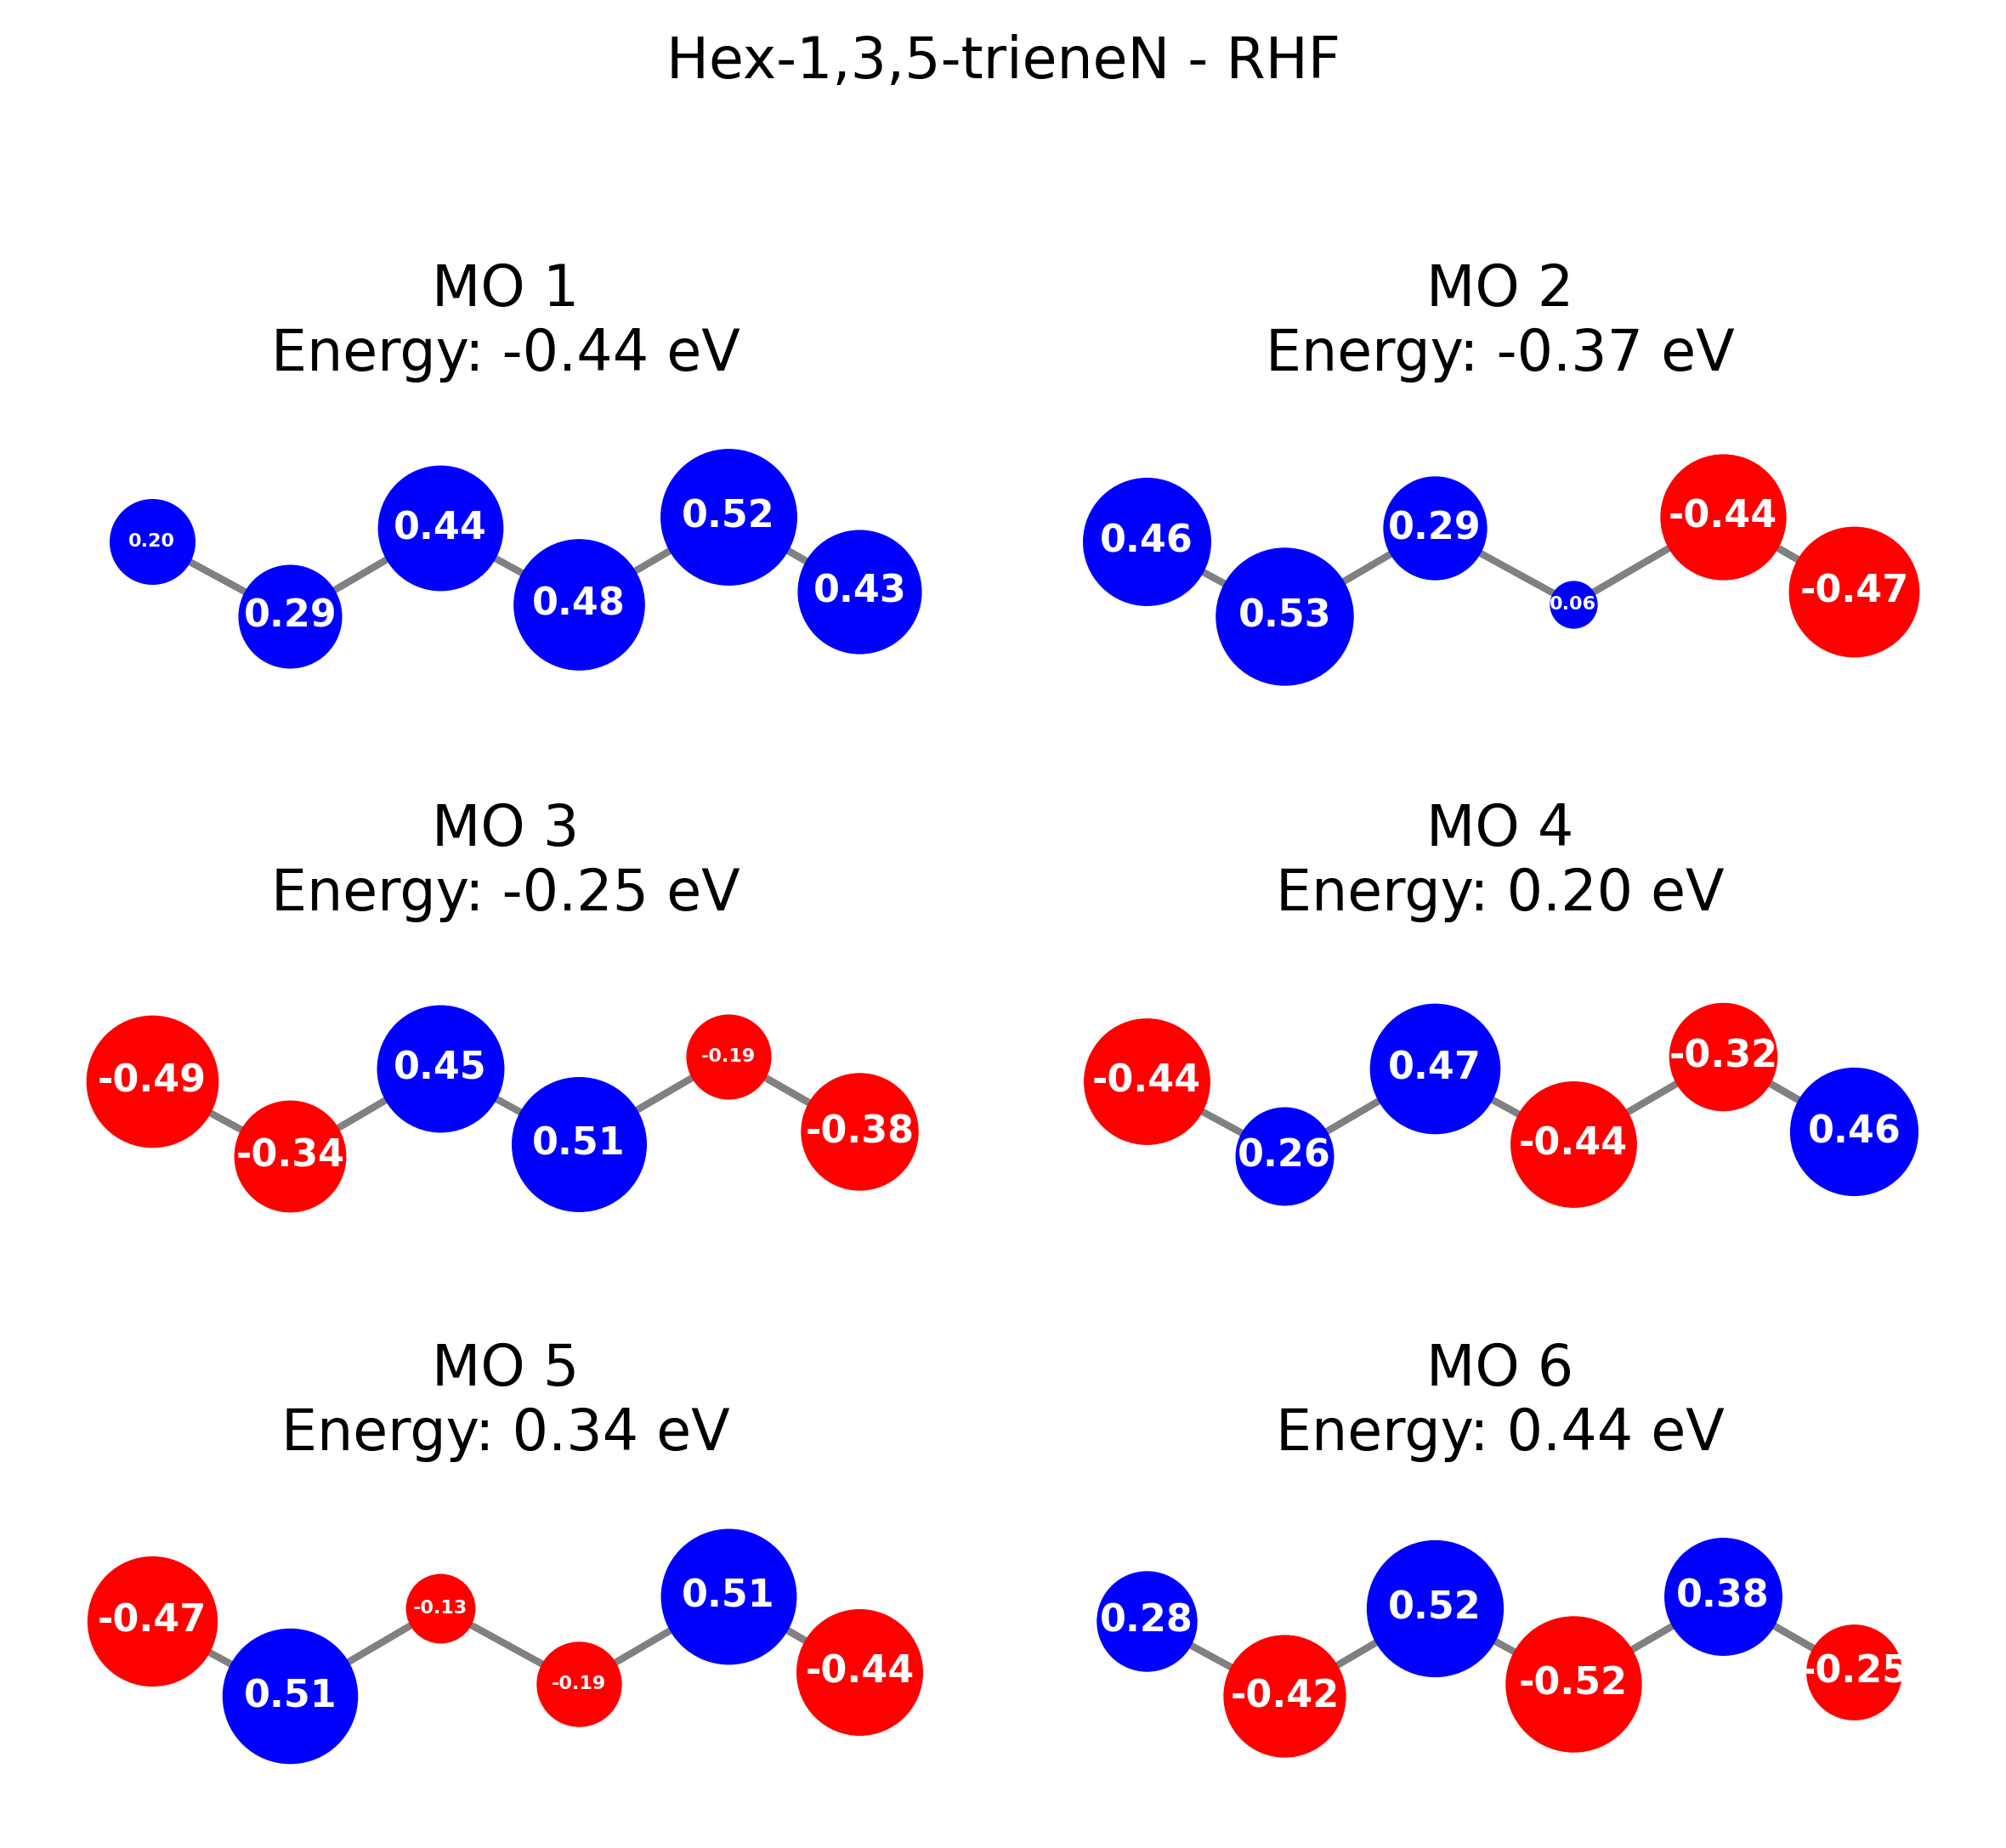

In [6]:
pts.plot_MOs(mo_eigenvalues, pz_AO_MO, coordinates, extra_bounds, 'Hex-1,3,5-trieneN', 'RHF', fig_size = (6,6))

In [7]:
D_rhf = pts.making_D(pz_AO_MO, 6)
print(D_rhf)

[[ 1.10712339  1.01062124 -0.03054184 -0.25018977  0.00846098  0.10591749]
 [ 1.01062124  1.00522386  0.2552115   0.02216711 -0.02894686 -0.00874302]
 [-0.03054184  0.2552115   0.98412016  0.90984317 -0.0093652  -0.25584352]
 [-0.25018977  0.02216711  0.90984317  0.96018291  0.25904508  0.00183111]
 [ 0.00846098 -0.02894686 -0.0093652   0.25904508  0.97422957  0.93630318]
 [ 0.10591749 -0.00874302 -0.25584352  0.00183111  0.93630318  0.96912012]]


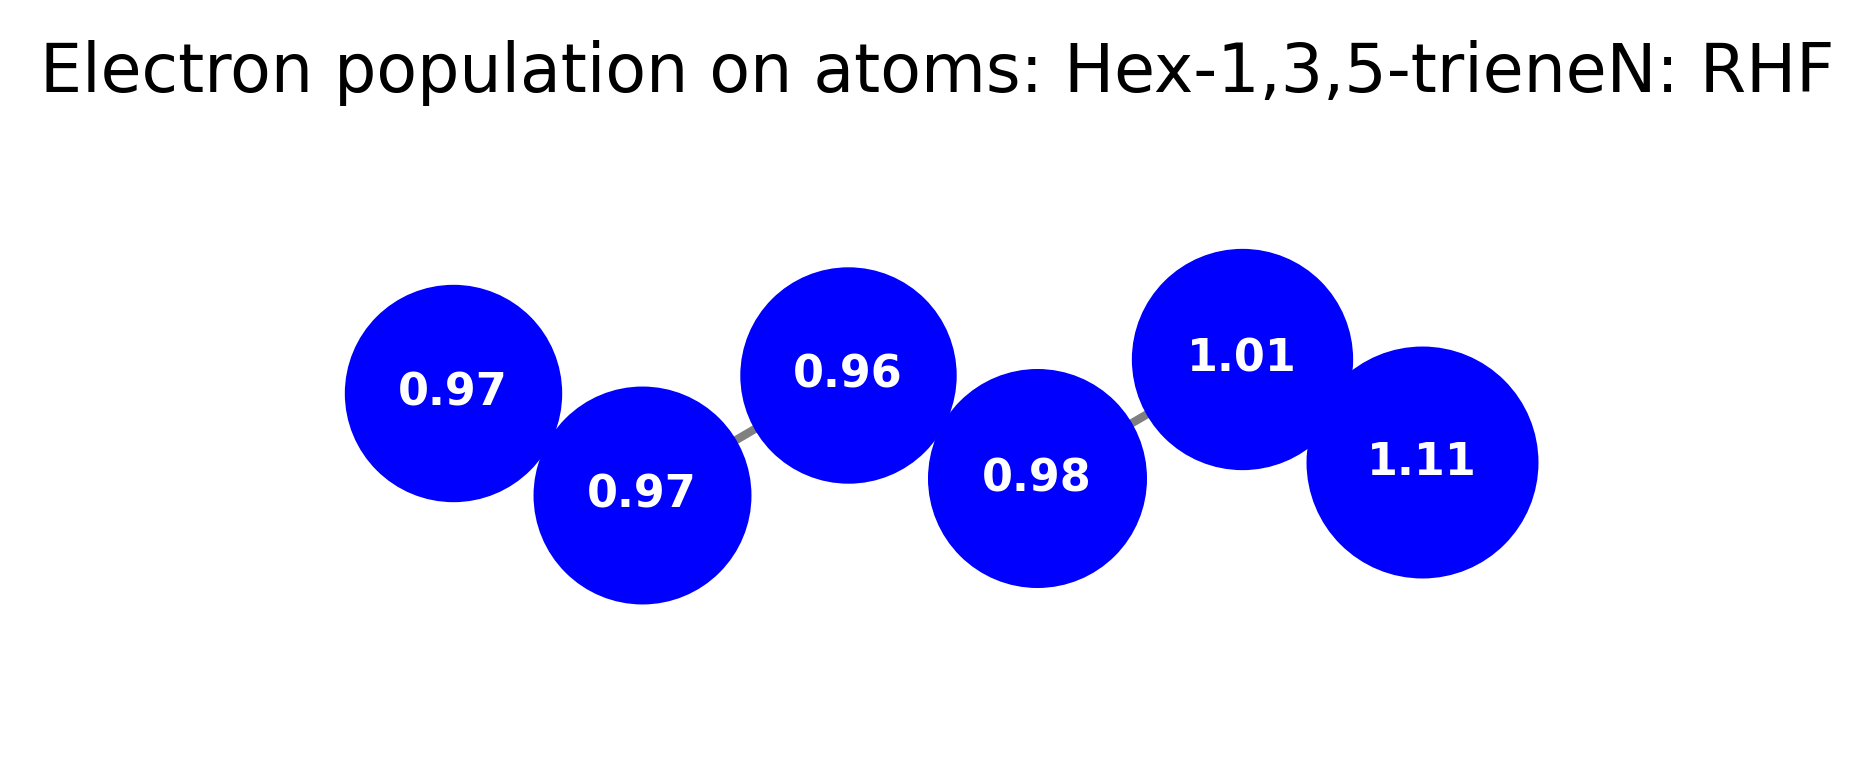

In [8]:
pts.plotting_of_D_atoms(6, coordinates, extra_bounds, D_rhf, 'Hex-1,3,5-trieneN', 'RHF',(5,2))

In [9]:
import numpy as np
from scipy.optimize import minimize

# Define the matrix
A = np.array([[-0.09, -0.1,  0.0,   0.0,   0.0,  -0.0],
              [-0.1,  -0.09, -0.1,   0.0,   0.0,   0.0],
              [ 0.0,  -0.1,  -0.09, -0.1,   0.0,   0.0],
              [ 0.0,   0.0,  -0.1,  -0.09, -0.1,   0.0],
              [ 0.0,   0.0,   0.0,  -0.1,  -0.09, -0.13],
              [-0.0,   0.0,   0.0,   0.0,  -0.13,  -0.15]])
print(A)

# Function to calculate the eigenvalues of the matrix
def get_eigenvalues(matrix):
    matrix_2d = np.atleast_2d(matrix)
    eigenvalues, _ = np.linalg.eig(matrix_2d)
    return eigenvalues

# Objective function that measures the difference between the found eigenvalues and the desired eigenvalues
def objective_function(matrix, target_eigenvalues):
    matrix = matrix.reshape(6,6)
    current_eigenvalues = get_eigenvalues(matrix)
    difference = np.sum(np.abs(current_eigenvalues - target_eigenvalues))
    return difference

# Optimization

# Reshape the matrix to a vector
initial_guess = A
print(A.shape[-2:])

# Optimize a symmetric matrix
result = minimize(objective_function, initial_guess, args=(mo_eigenvalues),  method='L-BFGS-B')
optimized_matrix = np.triu(result.x.reshape(A.shape)) + np.triu(result.x.reshape(A.shape), 1).T

# Calculate the final eigenvalues of the optimized matrix
optimized_eigenvalues = get_eigenvalues(optimized_matrix)

print("Optimized matrix:")
print(optimized_matrix)
print("Eigenvalues of the optimized matrix:")
print(optimized_eigenvalues)
print(mo_eigenvalues)


[[-0.09 -0.1   0.    0.    0.   -0.  ]
 [-0.1  -0.09 -0.1   0.    0.    0.  ]
 [ 0.   -0.1  -0.09 -0.1   0.    0.  ]
 [ 0.    0.   -0.1  -0.09 -0.1   0.  ]
 [ 0.    0.    0.   -0.1  -0.09 -0.13]
 [-0.    0.    0.    0.   -0.13 -0.15]]
(6, 6)
Optimized matrix:
[[-0.0575047   0.30367611  0.05256813 -0.1748505  -0.04164647  0.08793967]
 [ 0.30367611 -0.00491987  0.12885688  0.01016535 -0.06034548 -0.00193243]
 [ 0.05256813  0.12885688 -0.04666477  0.24349422  0.04949789 -0.16763442]
 [-0.1748505   0.01016535  0.24349422 -0.00746393  0.0857356  -0.03339294]
 [-0.04164647 -0.06034548  0.04949789  0.0857356  -0.10098216  0.25913553]
 [ 0.08793967 -0.00193243 -0.16763442 -0.03339294  0.25913553  0.04390209]]
Eigenvalues of the optimized matrix:
[-0.43620004 -0.36709777 -0.25184521  0.2048456   0.33822226  0.33844181]
[-0.43594023 -0.36712773 -0.25182655  0.20442883  0.335408    0.43666299]


[[-0.55636728 -0.42509808 -0.21336999  0.11374825  0.52724188 -0.41629035]
 [ 0.22003747  0.54416348  0.39035051  0.22724076  0.65213614 -0.16179059]
 [ 0.46872414 -0.27090268 -0.49985725  0.34195087  0.36148508  0.4576574 ]
 [-0.40532886 -0.19807309  0.52553685  0.45721148 -0.03369227  0.55687439]
 [-0.30757694  0.52657107 -0.46324554  0.57271246 -0.27935238 -0.08651929]
 [ 0.4042791  -0.36507455  0.24790532  0.53051926 -0.29477121 -0.52295429]]


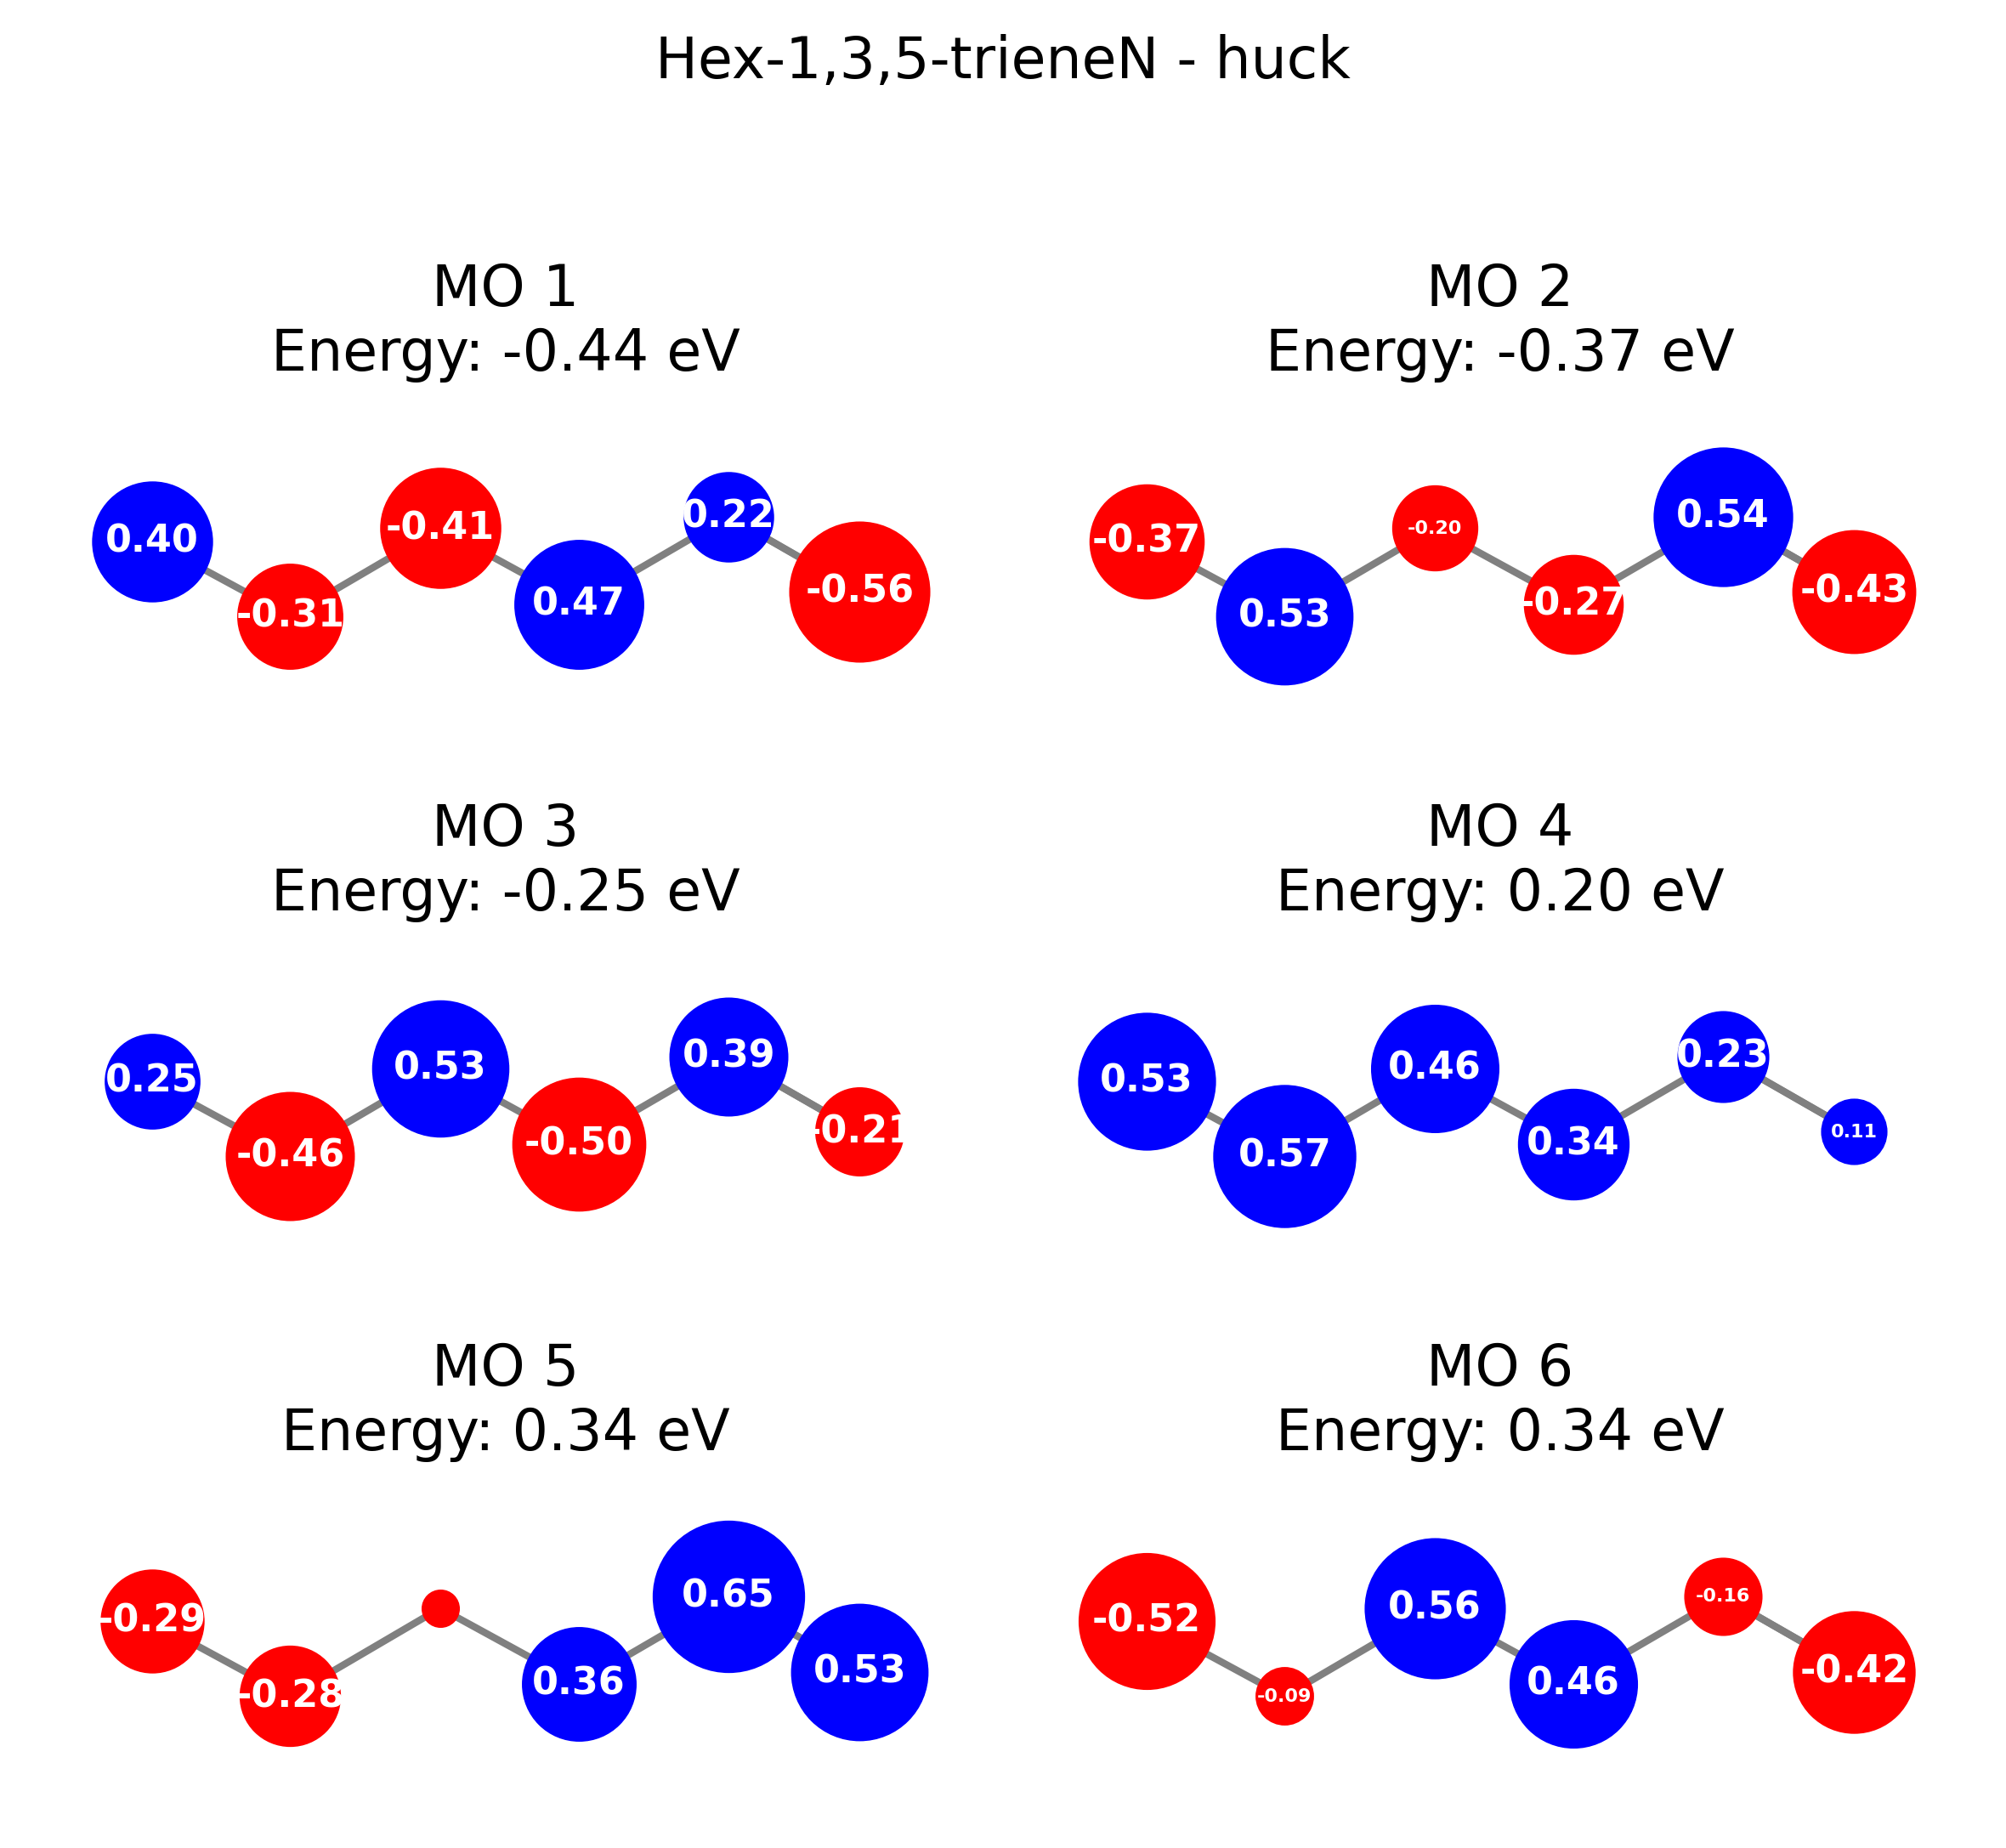

In [10]:
optimized_eigenvalues, optimized_eigenvectors = np.linalg.eigh(optimized_matrix)
print(optimized_eigenvectors)
pts.plot_MOs(optimized_eigenvalues, optimized_eigenvectors, coordinates, extra_bounds, 'Hex-1,3,5-trieneN', 'huck', fig_size = (6,6))

[[ 1.07155936 -0.87406717 -0.07793605  0.39515681  0.09224818 -0.24526145]
 [-0.87406717  0.9938078  -0.478796    0.0163438   0.07606832 -0.02586744]
 [-0.07793605 -0.478796    1.08589569 -0.79804458 -0.11052322  0.32895555]
 [ 0.39515681  0.0163438  -0.79804458  0.95942682 -0.4461647   0.07745768]
 [ 0.09224818  0.07606832 -0.11052322 -0.4461647   1.1729542  -0.86285132]
 [-0.24526145 -0.02586744  0.32895555  0.07745768 -0.86285132  0.71635613]]


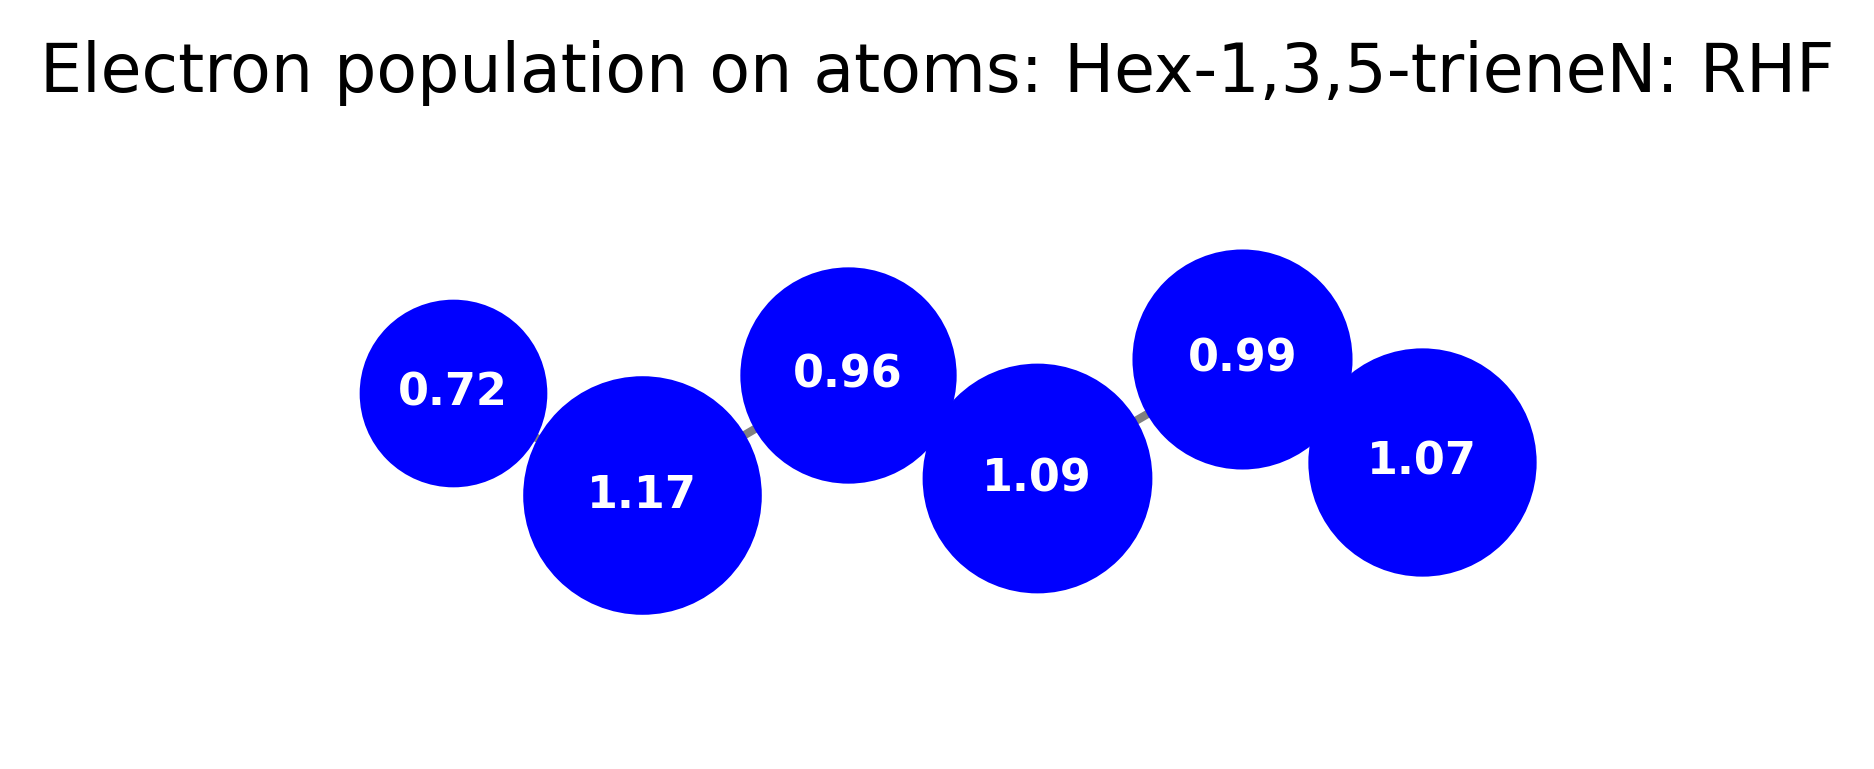

In [11]:
D_opt = pts.making_D(optimized_eigenvectors, 6)
print(D_opt)
pts.plotting_of_D_atoms(6, coordinates, extra_bounds, D_opt, 'Hex-1,3,5-trieneN', 'RHF',(5,2))

In [12]:
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/Huckel')
from class_huckel import huckel
c = 1
N= 0
NC= 0
a =0
b = 0
for N in np.linspace(0, 1, 21):
    for NC in np.linspace(0, 0.1, 11):
        for a in np.linspace(0, 0.5, 11):
            for b in np.linspace(0, 1, 11):
                HextrieneN_huckel = huckel(6, -a, -b, 'lin')
                HextrieneN_huckel.create_matrix()
                for r, k in [(0,1)]:
                    HextrieneN_huckel.huckel_matrix[r][k] = -NC
                    HextrieneN_huckel.huckel_matrix[k][r] = -NC
                HextrieneN_huckel.huckel_matrix[0][0] = -N
                HextrieneN_huckel.solve_huckel_matrix()
                eigval = HextrieneN_huckel.eigenvalues
                eigvec = HextrieneN_huckel.eigenvectors.round(6)
                c1 = np.linalg.norm(eigval-mo_eigenvalues)
                if c1<c:
                    c = c1
                
                print([N,NC,a,b])
                print(c)





[0.0, 0.0, 0.0, 0.0]
0.8562753656689788
[0.0, 0.0, 0.0, 0.1]
0.6086228869353364
[0.0, 0.0, 0.0, 0.2]
0.4094337837202289
[0.0, 0.0, 0.0, 0.30000000000000004]
0.3533413591718681
[0.0, 0.0, 0.0, 0.4]
0.3533413591718681
[0.0, 0.0, 0.0, 0.5]
0.3533413591718681
[0.0, 0.0, 0.0, 0.6000000000000001]
0.3533413591718681
[0.0, 0.0, 0.0, 0.7000000000000001]
0.3533413591718681
[0.0, 0.0, 0.0, 0.8]
0.3533413591718681
[0.0, 0.0, 0.0, 0.9]
0.3533413591718681
[0.0, 0.0, 0.0, 1.0]
0.3533413591718681
[0.0, 0.0, 0.05, 0.0]
0.3533413591718681
[0.0, 0.0, 0.05, 0.1]
0.3533413591718681
[0.0, 0.0, 0.05, 0.2]
0.3533413591718681
[0.0, 0.0, 0.05, 0.30000000000000004]
0.3302540908697767
[0.0, 0.0, 0.05, 0.4]
0.3302540908697767
[0.0, 0.0, 0.05, 0.5]
0.3302540908697767
[0.0, 0.0, 0.05, 0.6000000000000001]
0.3302540908697767
[0.0, 0.0, 0.05, 0.7000000000000001]
0.3302540908697767
[0.0, 0.0, 0.05, 0.8]
0.3302540908697767
[0.0, 0.0, 0.05, 0.9]
0.3302540908697767
[0.0, 0.0, 0.05, 1.0]
0.3302540908697767
[0.0, 0.0, 0.1, 0

[-2.23273  -1.504987 -1.002956 -0.49342   0.501669  1.232425]
[[-0.023535  0.099252  0.987671 -0.113225  0.033361  0.012968]
 [-0.290122  0.501211  0.029195  0.573575 -0.500968 -0.289493]
 [-0.50035   0.493786 -0.084083  0.007549  0.498468  0.500228]
 [-0.57685  -0.004963 -0.071486 -0.573625  0.001668 -0.577114]
 [-0.499175 -0.498773  0.048129 -0.003774 -0.500139  0.49958 ]
 [-0.288086 -0.496298  0.095692  0.57365   0.499306 -0.28837 ]]


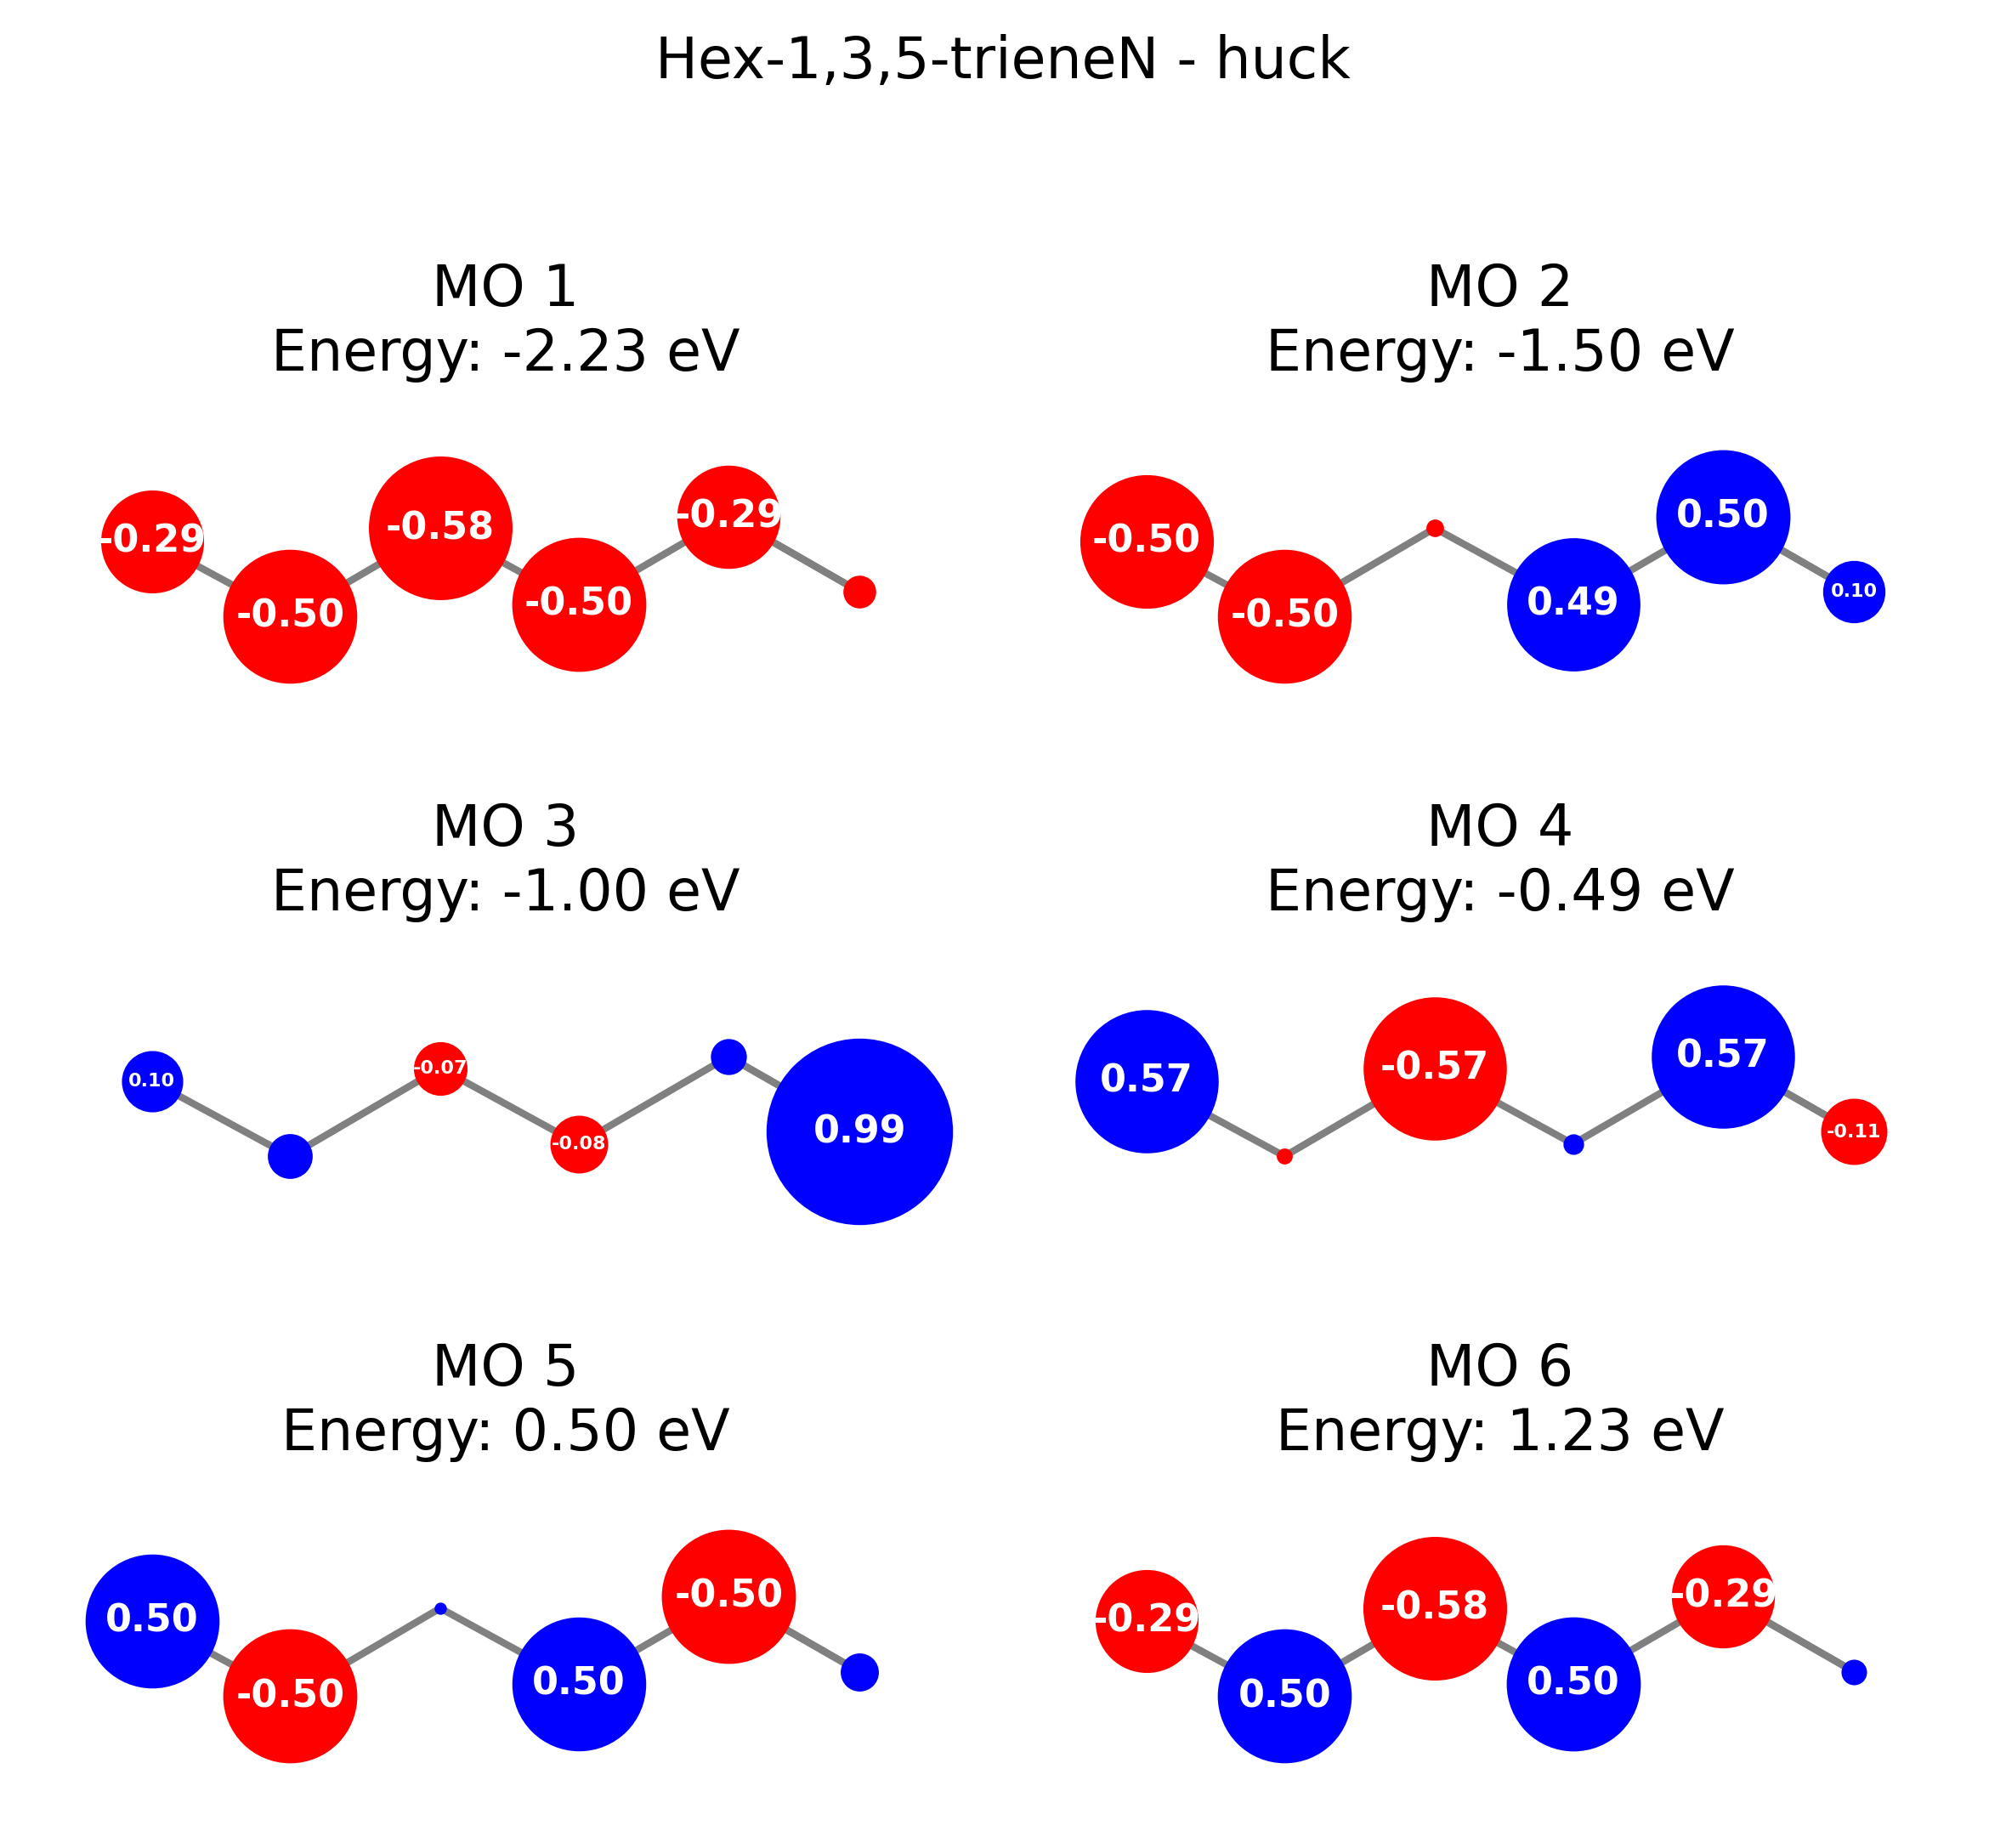

In [13]:
HextrieneN_huckel.solve_huckel_matrix()
eigval = HextrieneN_huckel.eigenvalues
eigvec = HextrieneN_huckel.eigenvectors.round(6)

print(eigval)
print(eigvec)
pts.plot_MOs(eigval, eigvec, coordinates, extra_bounds, 'Hex-1,3,5-trieneN', 'huck', fig_size = (6,6))

In [14]:
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/Huckel')
from class_huckel import huckel
N = -0.1
NC = -0.05
HextrieneN_huckel = huckel(6, -0.08, -0.06, 'lin')
HextrieneN_huckel.create_matrix()
for r, k in [(0,1)]:
    HextrieneN_huckel.huckel_matrix[r][k] = NC
    HextrieneN_huckel.huckel_matrix[k][r] = NC
HextrieneN_huckel.huckel_matrix[0][0] = N
huc_mat = HextrieneN_huckel.huckel_matrix
print(huc_mat)

[[-0.1  -0.05  0.    0.    0.    0.  ]
 [-0.05 -0.08 -0.06  0.    0.    0.  ]
 [ 0.   -0.06 -0.08 -0.06  0.    0.  ]
 [ 0.    0.   -0.06 -0.08 -0.06  0.  ]
 [ 0.    0.    0.   -0.06 -0.08 -0.06]
 [ 0.    0.    0.    0.   -0.06 -0.08]]


[-0.187305 -0.15417  -0.110958 -0.061824 -0.011754  0.02601 ]
[[-0.225904  0.469274 -0.604492  0.498486  0.307458  0.142548]
 [-0.39445   0.508409 -0.132482 -0.380604 -0.54264  -0.359249]
 [-0.517187  0.237414  0.435387 -0.300108  0.361005  0.515947]
 [-0.530494 -0.214927  0.357127  0.471516  0.132019 -0.552345]
 [-0.431556 -0.503098 -0.251121  0.15727  -0.511169  0.459959]
 [-0.241307 -0.406984 -0.486698 -0.519159  0.449404 -0.260329]]


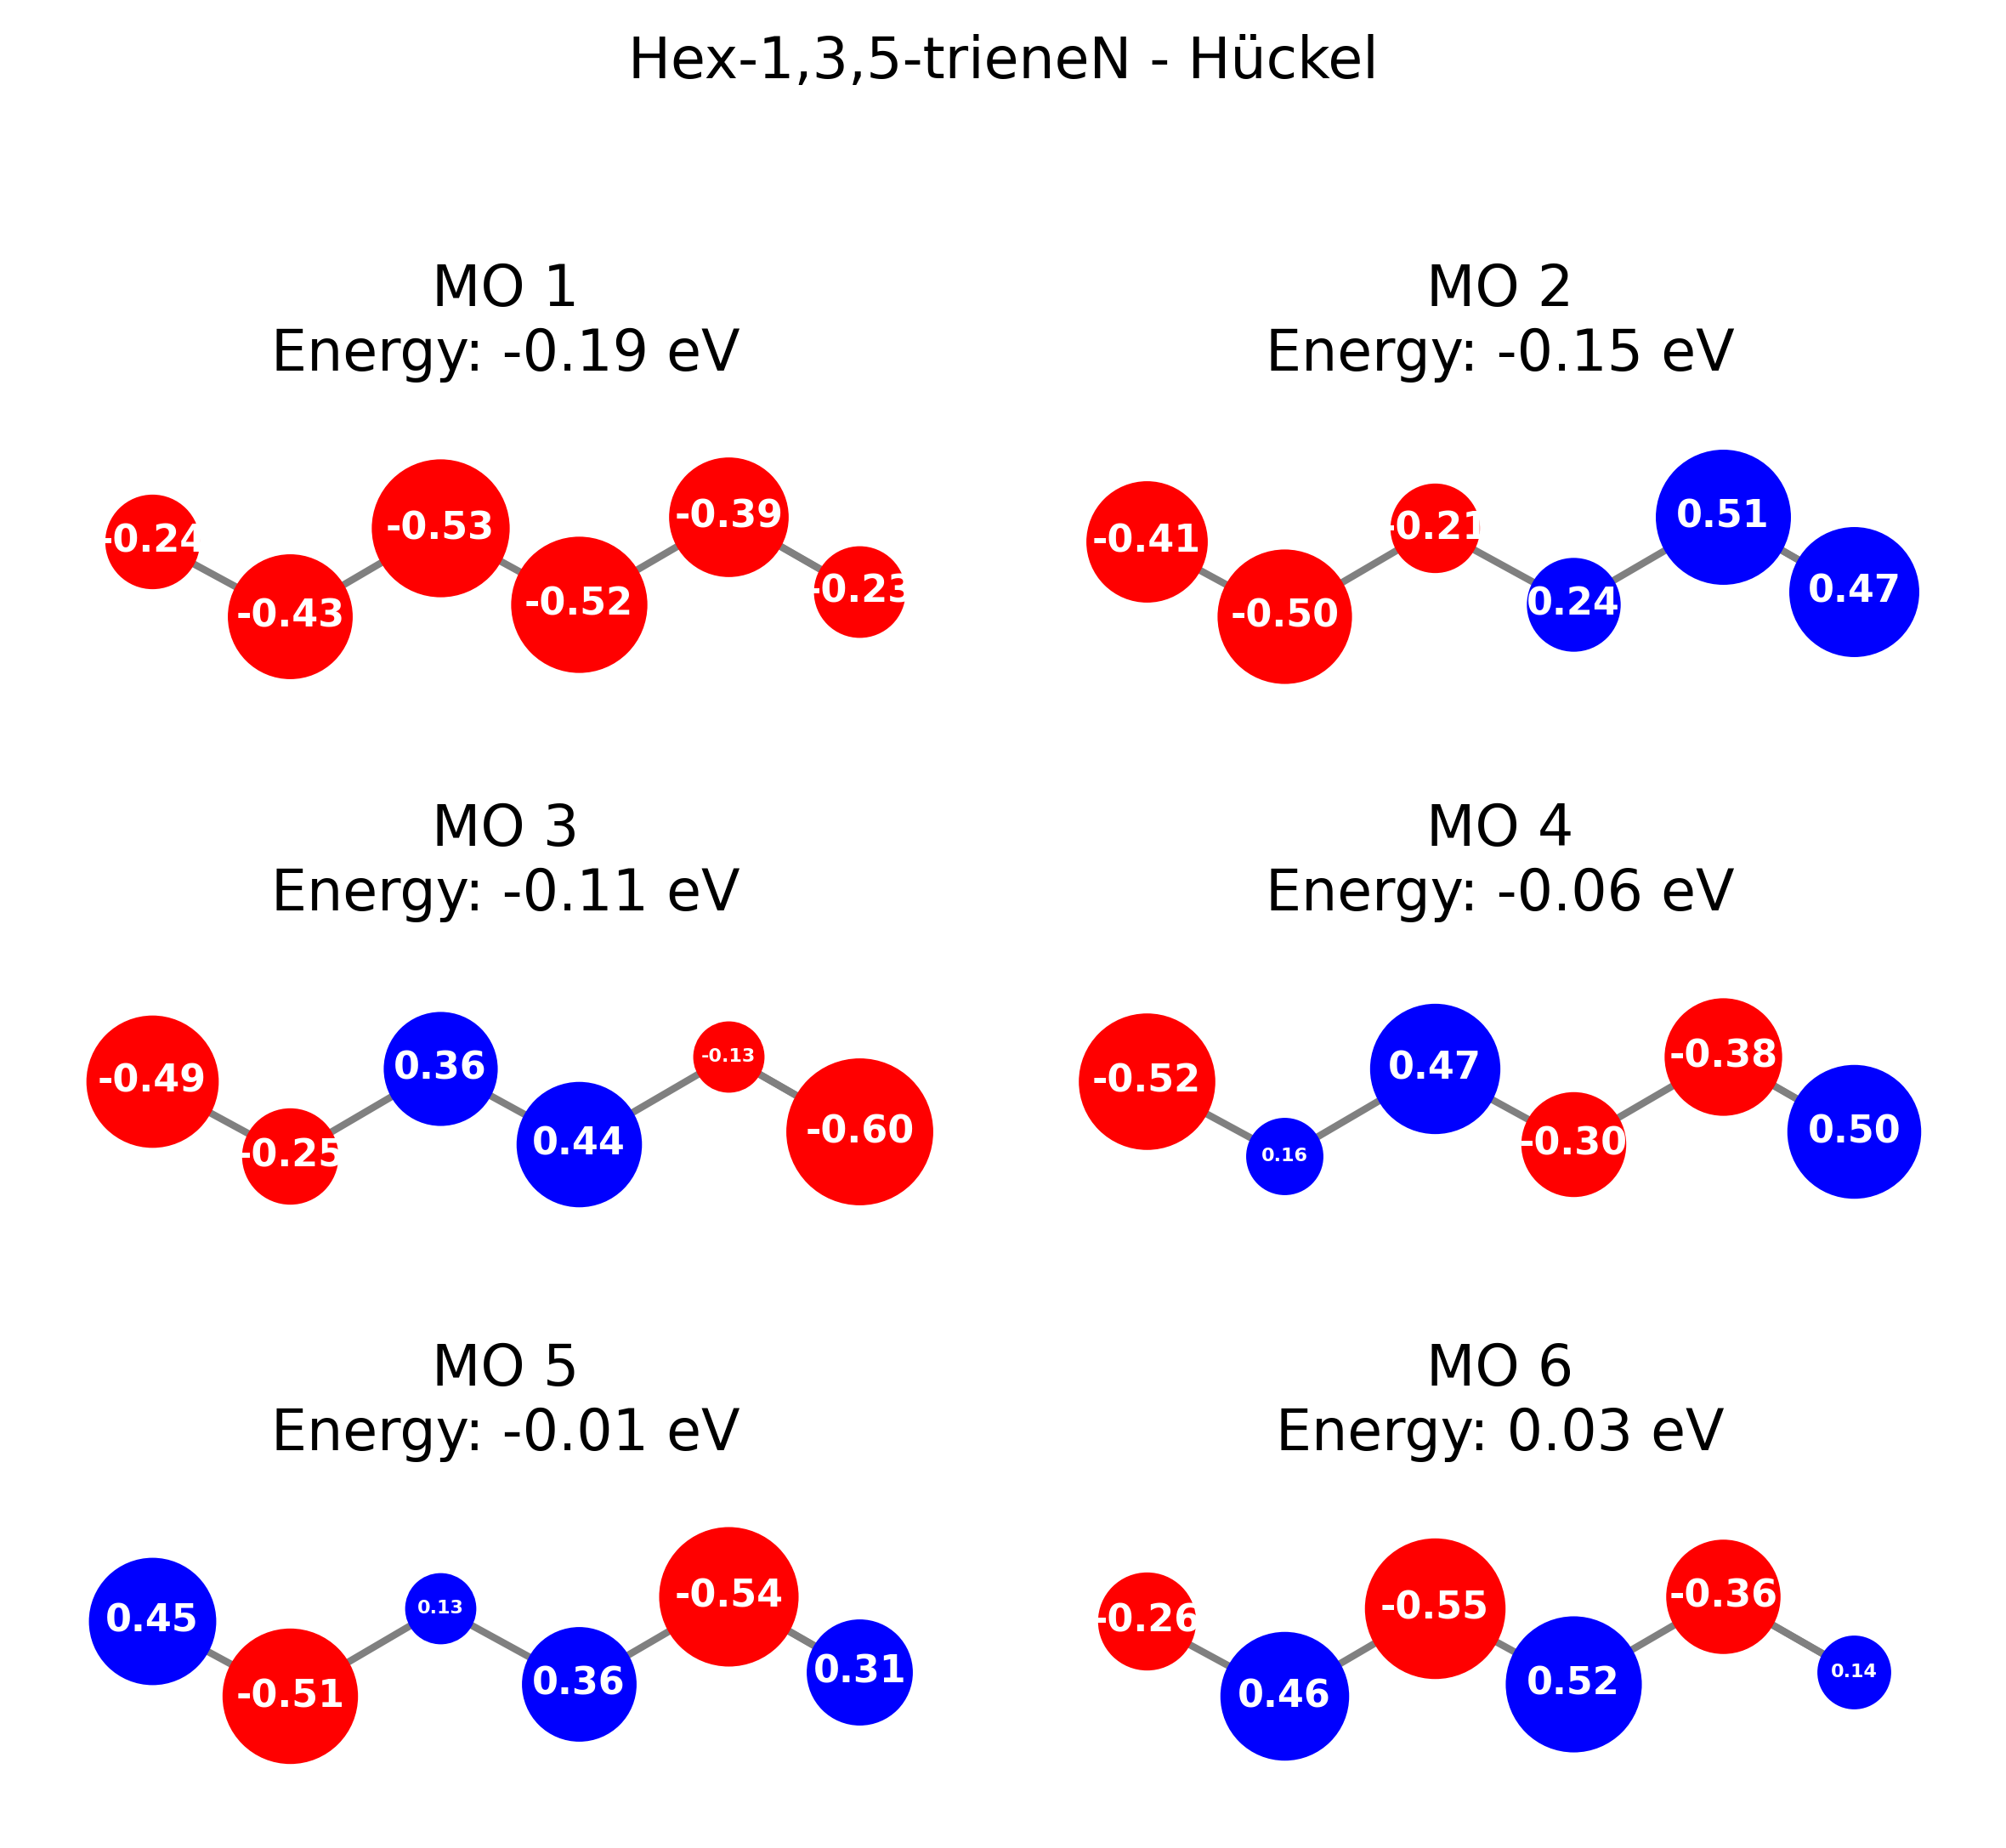

In [15]:
HextrieneN_huckel.solve_huckel_matrix()
eigval = HextrieneN_huckel.eigenvalues
eigvec = HextrieneN_huckel.eigenvectors.round(6)

print(eigval)
print(eigvec)
pts.plot_MOs(eigval, eigvec, coordinates, extra_bounds, 'Hex-1,3,5-trieneN', 'Hückel', fig_size = (6,6))

[[ 1.27332256  0.81555053 -0.06988226 -0.3937987   0.0264001   0.31546051]
 [ 0.81555053  0.86324399  0.53405377  0.10533928 -0.10456655 -0.09450412]
 [-0.06988226  0.53405377  1.02681928  0.75765275 -0.01116435 -0.36744968]
 [-0.3937987   0.10533928  0.75765275  0.91031439  0.49477025  0.08334154]
 [ 0.0264001  -0.10456655 -0.01116435  0.49477025  1.00481987  0.86222082]
 [ 0.31546051 -0.09450412 -0.36744968  0.08334154  0.86222082  0.92147998]]


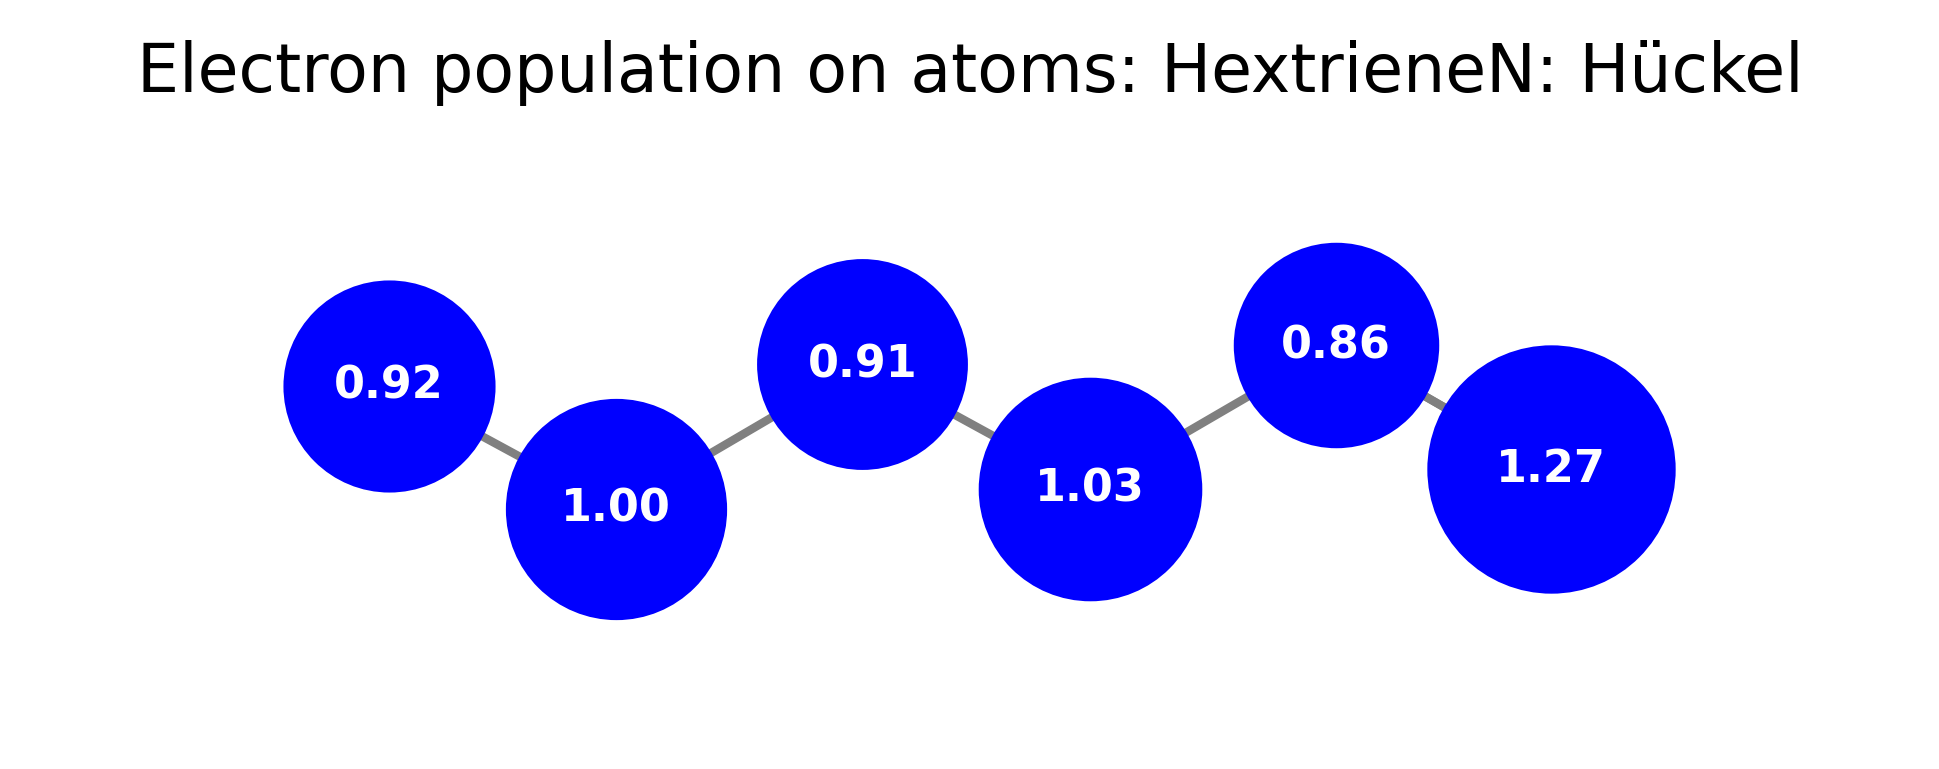

In [16]:
D_huckel = pts.making_D(eigvec, 6)
print(D_huckel)
pts.plotting_of_D_atoms(6, coordinates, extra_bounds, D_huckel, 'HextrieneN', 'Hückel', (6,2))

In [17]:
IP = {
    'H 1s': 13.6,
    'C 2s': 21.4, 'C 2p': 11.4,
    'N 2s': 25.58, 'N 2p': 13.9,
    'O 2s': 32.38, 'O 2p': 15.85,
    'F 2s': 40.20, 'F 2p': 18.66
}
K = 1.75

In [18]:
print(HextrieneN_molecule.ao_labels())
indices_valence_orbitals = pts.taking_indices(HextrieneN_molecule, IP.keys())
print(indices_valence_orbitals)
valence_orbitals = [label for index,label in enumerate(HextrieneN_molecule.ao_labels()) if index in indices_valence_orbitals]
print(valence_orbitals)
alg_valence_orbitals = [label[2::].lstrip()[:4] for label in valence_orbitals]
pz_indices_full = [i for i, label in enumerate(valence_orbitals) for a in ['C 2px', 'N 2px'] if a in label]

print(alg_valence_orbitals)
print(pz_indices_full)

['0 N 1s    ', '0 N 2s    ', '0 N 2px   ', '0 N 2py   ', '0 N 2pz   ', '1 C 1s    ', '1 C 2s    ', '1 C 2px   ', '1 C 2py   ', '1 C 2pz   ', '2 C 1s    ', '2 C 2s    ', '2 C 2px   ', '2 C 2py   ', '2 C 2pz   ', '3 C 1s    ', '3 C 2s    ', '3 C 2px   ', '3 C 2py   ', '3 C 2pz   ', '4 C 1s    ', '4 C 2s    ', '4 C 2px   ', '4 C 2py   ', '4 C 2pz   ', '5 C 1s    ', '5 C 2s    ', '5 C 2px   ', '5 C 2py   ', '5 C 2pz   ', '6 H 1s    ', '7 H 1s    ', '8 H 1s    ', '9 H 1s    ', '10 H 1s    ', '11 H 1s    ', '12 H 1s    ']
[1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
['0 N 2s    ', '0 N 2px   ', '0 N 2py   ', '0 N 2pz   ', '1 C 2s    ', '1 C 2px   ', '1 C 2py   ', '1 C 2pz   ', '2 C 2s    ', '2 C 2px   ', '2 C 2py   ', '2 C 2pz   ', '3 C 2s    ', '3 C 2px   ', '3 C 2py   ', '3 C 2pz   ', '4 C 2s    ', '4 C 2px   ', '4 C 2py   ', '4 C 2pz   ', '5 C 2s    ', '5 C 2px   ', '5 C 2py   ', '5 C 2pz   ', '6 H 1s    ', '7 H 1s   

In [19]:
n = len(indices_valence_orbitals)
print(n)
EHT_full = np.zeros((n,n))

31


In [20]:
for i, label in enumerate(alg_valence_orbitals):
    alpha = IP[label] 
    EHT_full[i, i] = -alpha 
S_full = hf.get_ovlp()[indices_valence_orbitals][:, indices_valence_orbitals]
for i in range(n):
    for j in range(n):
        if i != j:
            EHT_full[i, j] = EHT_full[j, i] = K*S_full[i,j]*(EHT_full[i,i]+EHT_full[j,j])/2
A = fractional_matrix_power(S_full, -0.5)
A = np.asarray(A)
H_p = A @ EHT_full @ A 
eigenvalues_full, C_p = np.linalg.eigh(H_p)

print(eigenvalues_full)
C = A @ C_p

for i in range(n):
    C[:,i] = (np.dot(C[:,i], C[:,i]))**(-1/2) * C[:,i]


C_0 = C[pz_indices_full,:].round(6)
print(C_0[:,[9,13,15,16,17,18]])

[-29.44478482 -27.71399563 -25.30334856 -21.67504766 -19.6272378
 -18.85717912 -16.53212985 -15.77879118 -15.09410243 -14.83388266
 -14.67238278 -14.32513391 -13.81584906 -13.69652172 -13.18499414
 -12.54337925 -10.20932317  -8.39790761  -6.81919063   0.88295868
   3.45476055   4.30922634   5.95116567   8.17183695   9.26332501
  11.30072485  12.77394715  15.12397831  31.04219785  35.53693055
  37.91632705]
[[-0.853349 -0.276145 -0.306296  0.390571  0.284413  0.155408]
 [-0.467808 -0.003143  0.144565 -0.512533 -0.534182 -0.362839]
 [-0.201565  0.372333  0.559072 -0.305971  0.327491  0.529447]
 [-0.101023  0.550361  0.32294   0.504615  0.084824 -0.550085]
 [-0.041995  0.564549 -0.394558  0.181608 -0.534378  0.437565]
 [-0.018805  0.404339 -0.559245 -0.45114   0.48348  -0.264245]]


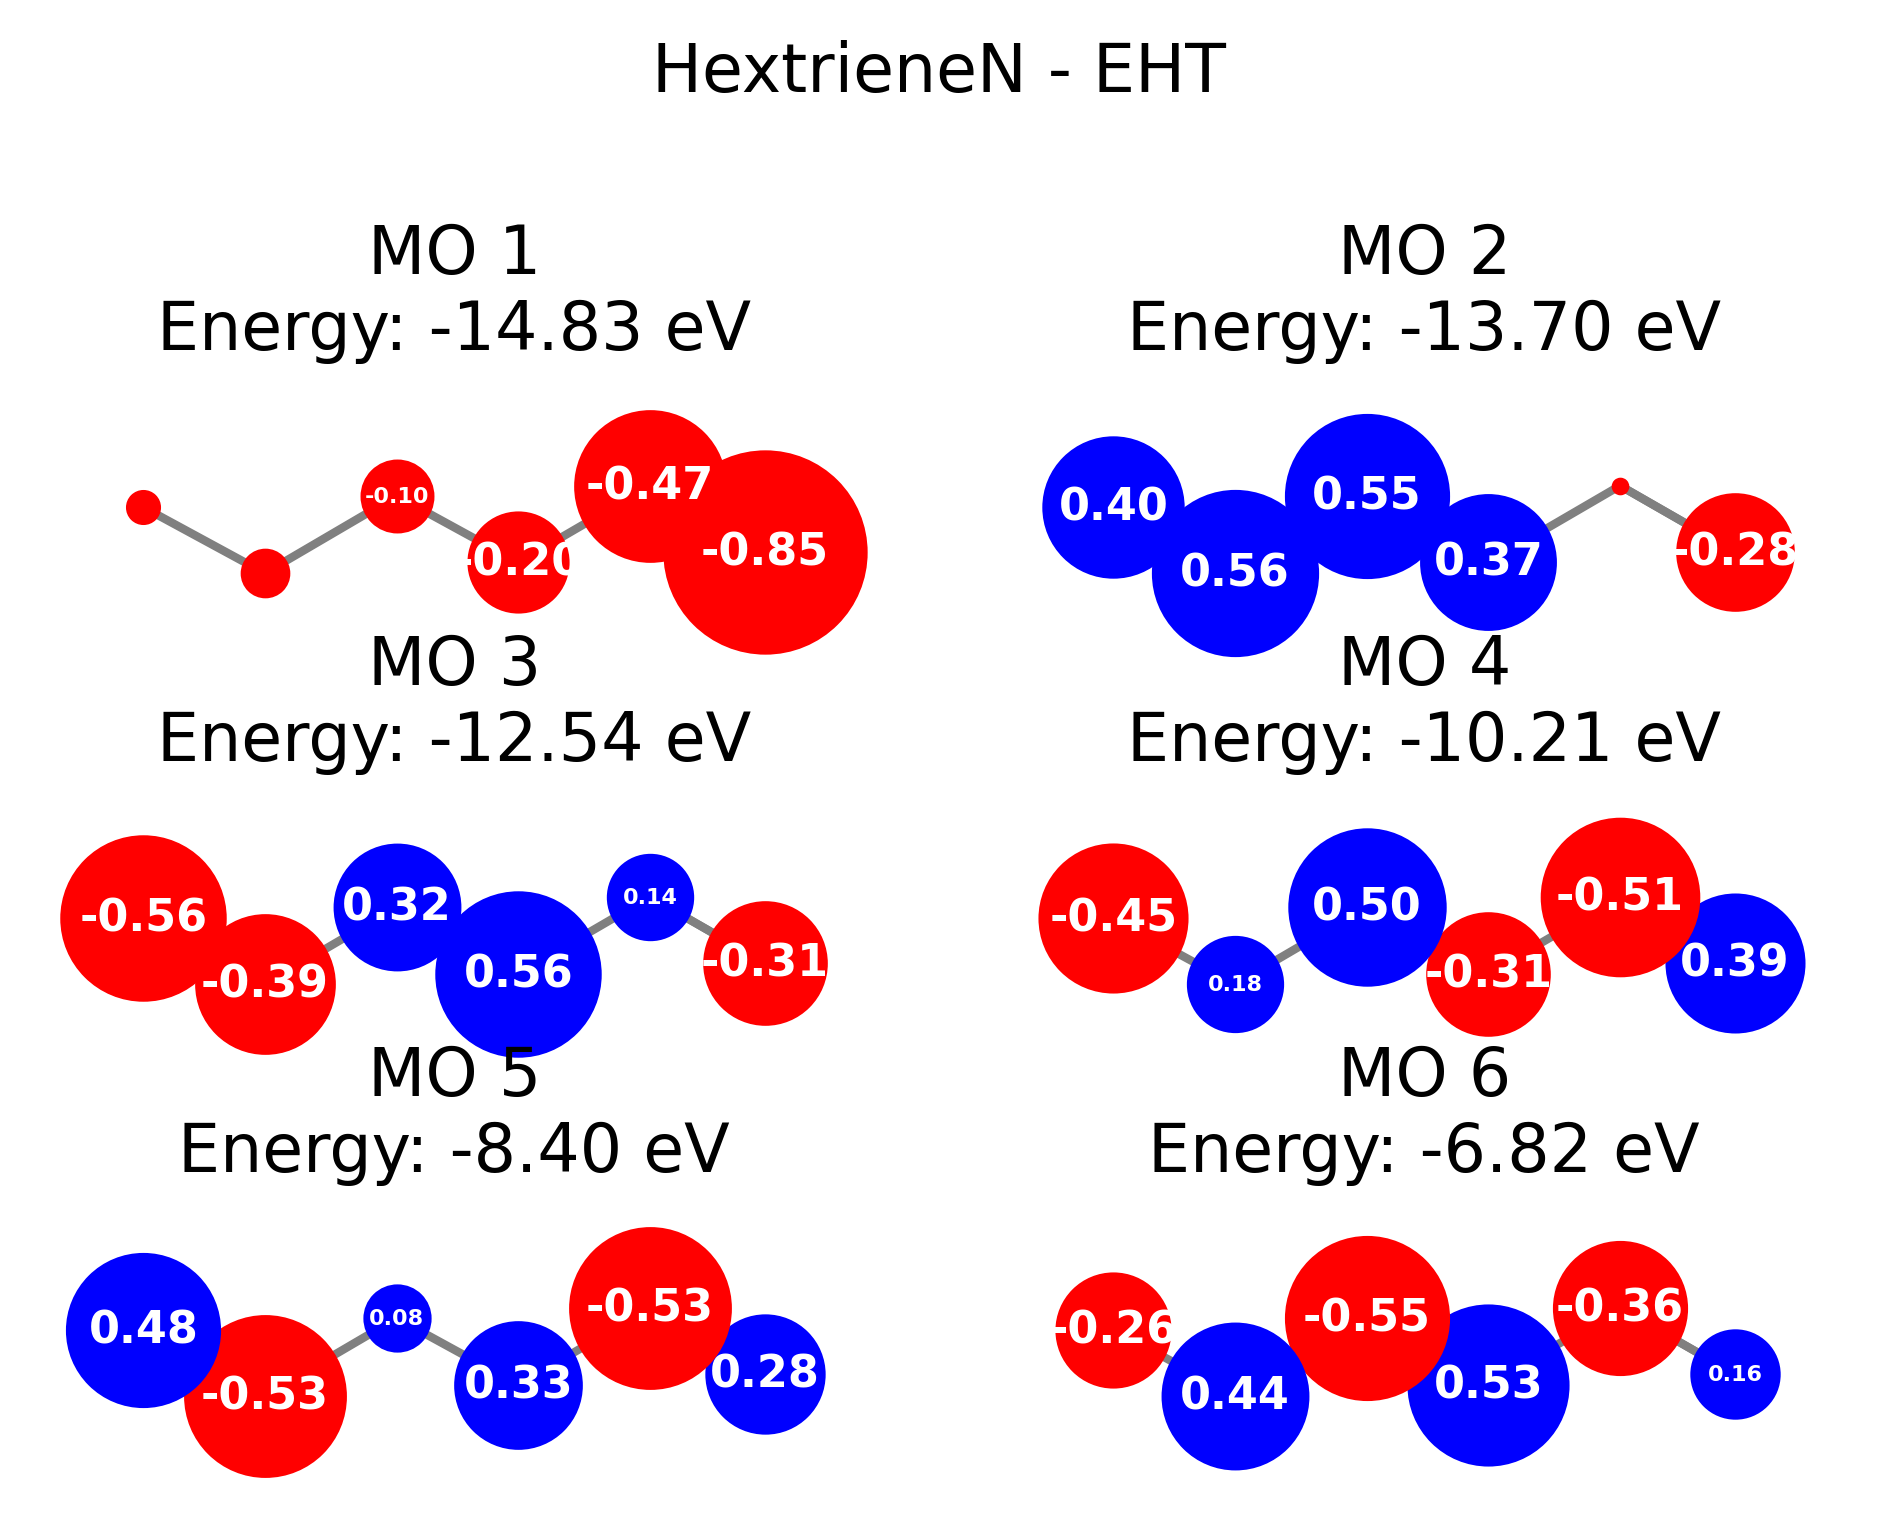

In [21]:
pts.plot_MOs(eigenvalues_full[[9,13,15,16,17,18]], C_0[:, [9,13,15,16,17,18]], coordinates, extra_bounds, 'HextrieneN', 'EHT', (5,4))

[[ 1.79655563e+00  7.11583463e-01 -2.04108245e-01 -3.29373585e-01
   1.58108964e-03  1.51371083e-01]
 [ 7.11583463e-01  4.79506485e-01  3.47891441e-01  1.84430808e-01
  -7.83361156e-02 -1.46641923e-01]
 [-2.04108245e-01  3.47891441e-01  9.83643627e-01  8.11653950e-01
  -3.84277037e-03 -3.16638076e-01]
 [-3.29373585e-01  1.84430808e-01  8.11653950e-01  8.34786241e-01
   3.75059305e-01  8.76591472e-02]
 [ 1.58108964e-03 -7.83361156e-02 -3.84277037e-03  3.75059305e-01
   9.52310338e-01  8.99426966e-01]
 [ 1.51371083e-01 -1.46641923e-01 -3.16638076e-01  8.76591472e-02
   8.99426966e-01  9.53197250e-01]]


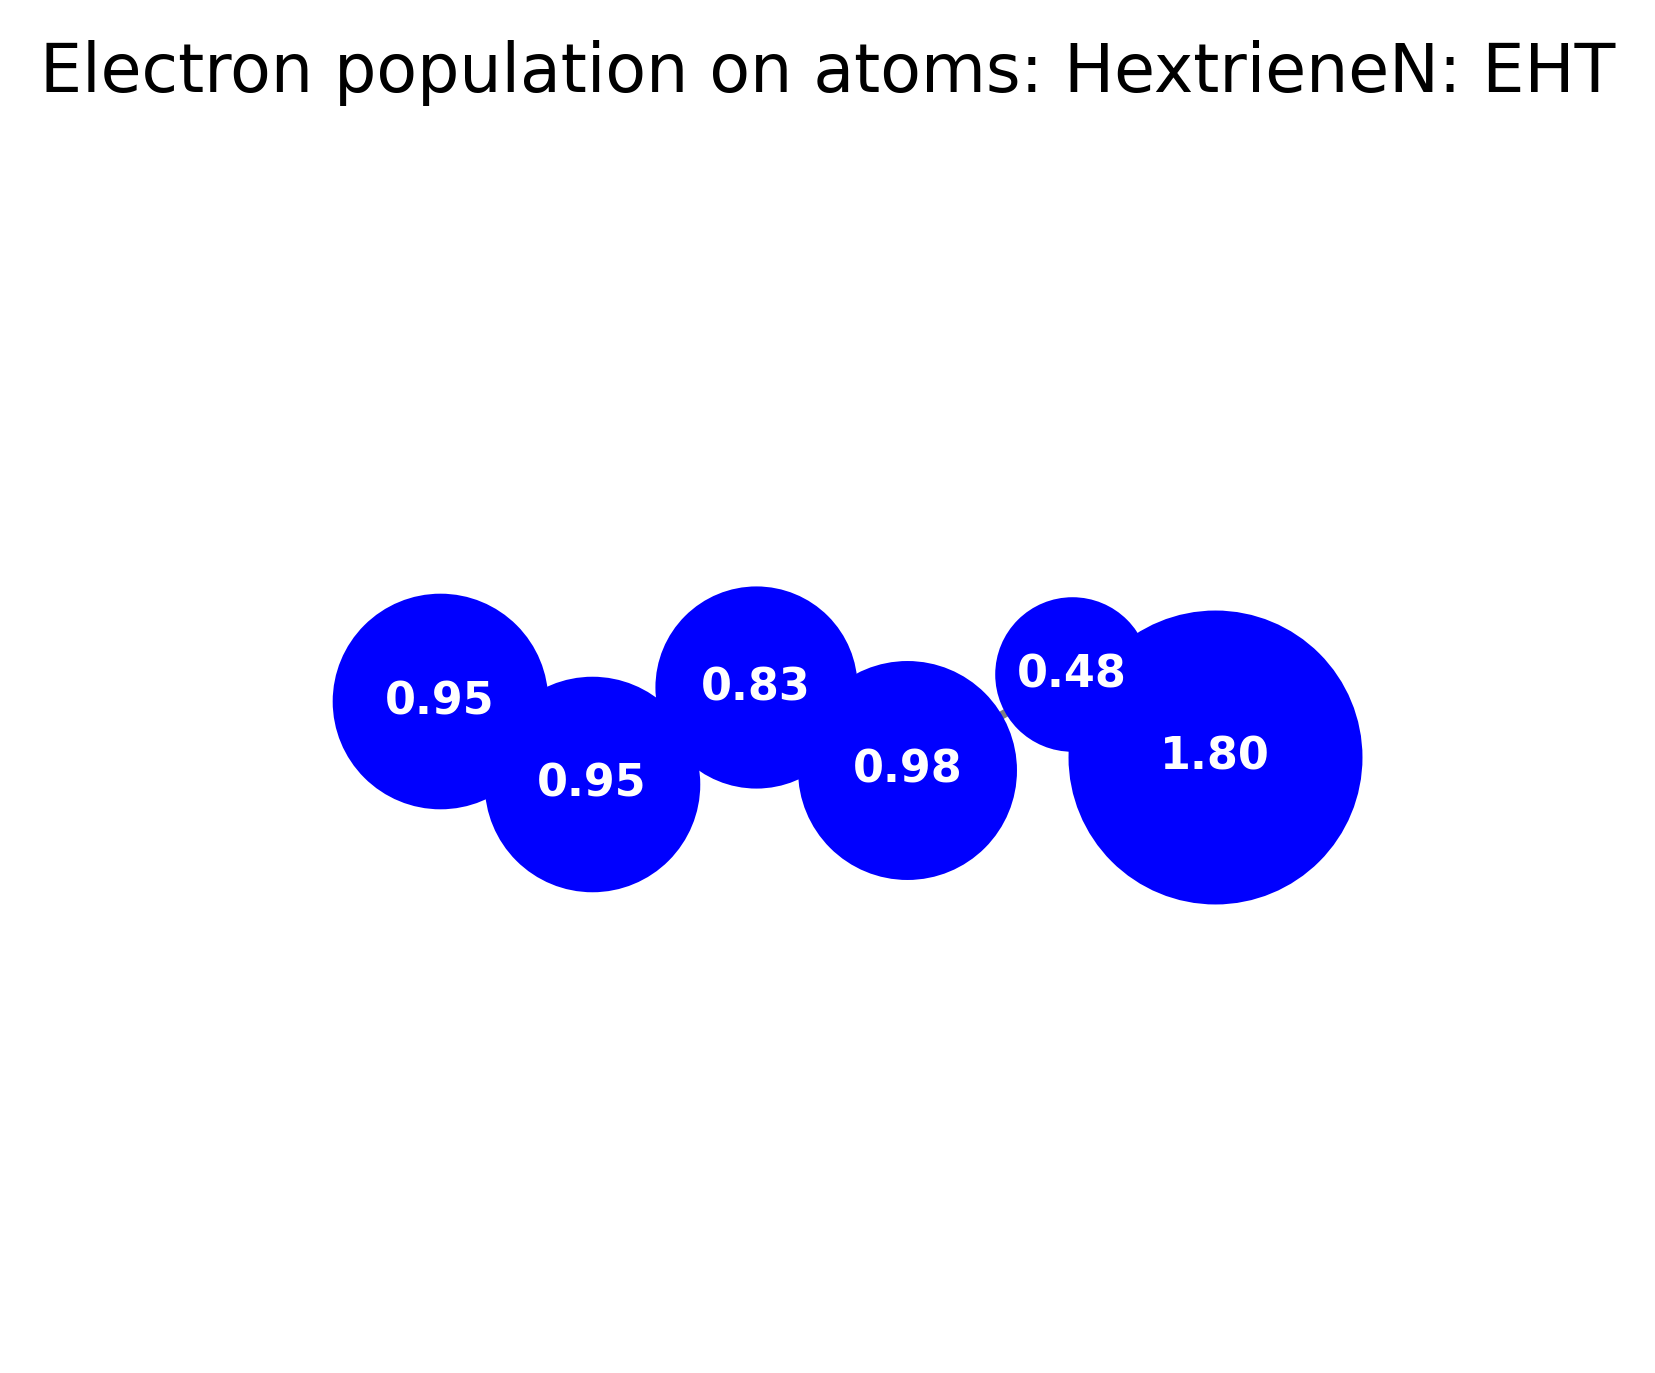

In [23]:
D_huckel = pts.making_D(C_0[:, [9,13,15,16,17,18]], 6)
print(D_huckel)
pts.plotting_of_D_atoms(6, coordinates, extra_bounds, D_huckel, 'HextrieneN', 'EHT')